# <center>  Intel Image Classification </center>

## <center>Image Scene Classification of Multiclass</center>


### Équipe 4 :

	. Léo CHARDON
	. Rémy BARBERET
	. Gwennaël FRANÇOIS
	. Pierrot CAVALIER
    
Base d'images utilisée : https://www.kaggle.com/puneet6060/intel-image-classification


In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
import pandas as pd


### Chargement base d'images


Les images des sets d'entraînements et de test sont chargées avec leurs classes associées.

Les différentes classes sont : **building**, **forest**, **glacier**, **mountain**, **sea**, **street**.

Le premier set est composé de 14034 images et le second de 3000 images.

Toutes les images sont redimensionnées aux dimensions (150, 150). La plupart des images sont déjà à ces dimensions mais une partie des images ne le sont pas.

In [2]:
train_path = "dataset/seg_train/seg_train"
test_path = "dataset/seg_test/seg_test"

classes_dir = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}

def load_images(path):
    images_x = []
    images_y = []

    for dir in classes_dir.keys():
        for filename in os.listdir(os.path.join(path, dir)):
            image = cv2.imread(os.path.join(path, dir, filename))
            image = cv2.resize(image, dsize = (150, 150))
            images_x.append(image)
            images_y.append(classes_dir[dir])

    images_x = np.array(images_x)
    images_y = np.array(images_y)
    
    return images_x, images_y


train_images_x, train_images_y = load_images(train_path)
test_images_x, test_images_y = load_images(test_path)

print("Loaded train images : " + str(len(train_images_x))) 
print("Loaded test images : " + str(len(test_images_x))) 

Loaded train images : 14034
Loaded test images : 3000


### Display dataset

On affiche quelques images choisies au hasard du set d'entrainement et du set de test avec les classes associées.

Train images :


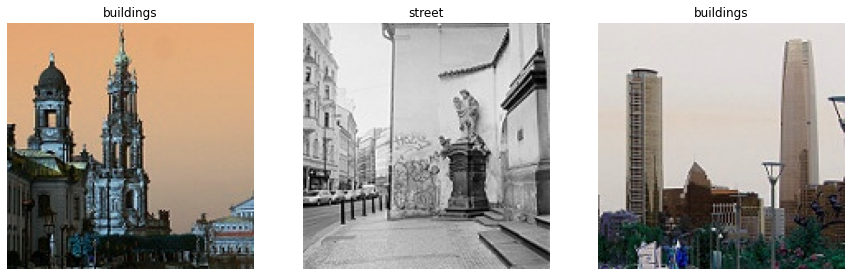

Test images


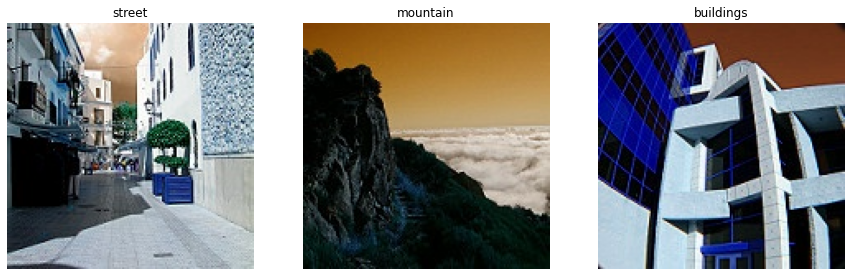

In [10]:
# TRAIN IMAGES
import random

inv_dict_classes = {v: k for k, v in classes_dir.items()}

print("Train images :")

fig, axs = plt.subplots(1, 3, figsize = (15, 15))

for i, ax in enumerate(axs.flat):
    i = random.randint(0, len(train_images_x)-1)
    ax.imshow(train_images_x[i])
    ax.axis('off')
    ax.set_title(inv_dict_classes[train_images_y[i]])

plt.show()



# TEST IMAGES
print("Test images")

fig, axs = plt.subplots(1, 3, figsize = (15, 15))

for i, ax in enumerate(axs.flat):
    i = random.randint(0, len(test_images_x)-1)
    ax.imshow(test_images_x[i])
    ax.axis('off')
    ax.set_title(inv_dict_classes[test_images_y[i]])
plt.show()

## Model

Nous utilisons un réseau neuronal convolutif (CNN) pour classifier les images.
Nous sommes convenus à un modèle composé de ces couches. En faisant des essais, c'est avec celui-là que nous obtenons les meilleurs résultats

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

### Initialisation CNN

In [6]:
# Init CNN
classifier = tf.keras.Sequential()

classifier.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
classifier.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(128, activation='relu'))
classifier.add(tf.keras.layers.Dense(6, activation='softmax')) # Number of possible outcome
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Normalisation

On normalise les images pour réduire leurs tailles et ainsi rendre l'entrainement du réseau plus rapide et plus efficace

In [7]:
train_images_x = train_images_x / 255.0

### Entrainement

In [8]:
train_images_x = np.array(train_images_x)
train_images_y = np.array(train_images_y)
test_images_x = np.array(test_images_x)
test_images_y = np.array(test_images_y)

history = classifier.fit(train_images_x, 
                         train_images_y,
                         validation_data=(test_images_x, test_images_y),
                         epochs=20)

Epoch 1/20
439/439 [==============================] - 14s 17ms/step - loss: 0.9112 - accuracy: 0.6606 - val_loss: 166.0838 - val_accuracy: 0.6343
Epoch 2/20
439/439 [==============================] - 9s 19ms/step - loss: 0.5725 - accuracy: 0.7942 - val_loss: 138.4559 - val_accuracy: 0.6897
Epoch 3/20
439/439 [==============================] - 8s 19ms/step - loss: 0.3599 - accuracy: 0.8741 - val_loss: 206.9142 - val_accuracy: 0.6867
Epoch 4/20
439/439 [==============================] - 8s 19ms/step - loss: 0.1979 - accuracy: 0.9339 - val_loss: 226.4890 - val_accuracy: 0.6990
Epoch 5/20
439/439 [==============================] - 8s 19ms/step - loss: 0.0991 - accuracy: 0.9689 - val_loss: 307.8829 - val_accuracy: 0.6860
Epoch 6/20
439/439 [==============================] - 9s 20ms/step - loss: 0.0637 - accuracy: 0.9805 - val_loss: 210.2286 - val_accuracy: 0.7377
Epoch 7/20
439/439 [==============================] - 8s 19ms/step - loss: 0.0567 - accuracy: 0.9853 - val_loss: 369.3395 - val_a

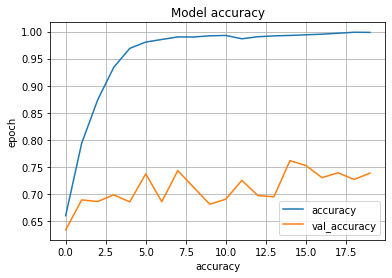

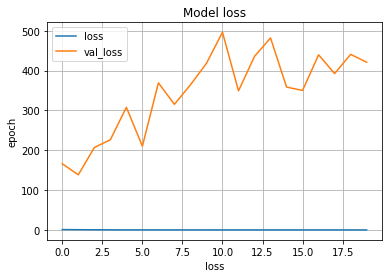

In [9]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.legend(["accuracy", "val_accuracy"])
plt.xlabel("accuracy")
plt.ylabel("epoch")
plt.grid()
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.legend(["loss", "val_loss"])
plt.xlabel("loss")
plt.ylabel("epoch")
plt.grid()
plt.show()

On peut voir que, arrivé à un certain nombre d'epochs, la précision n'augmente plus vraiment tandis que les pertes augmentent, ce qui fait baisser la précision totale. Pour éviter ce surentraînement, il faut limiter le nombre d'epochs.

### Predictions

Score de précision : 0.739


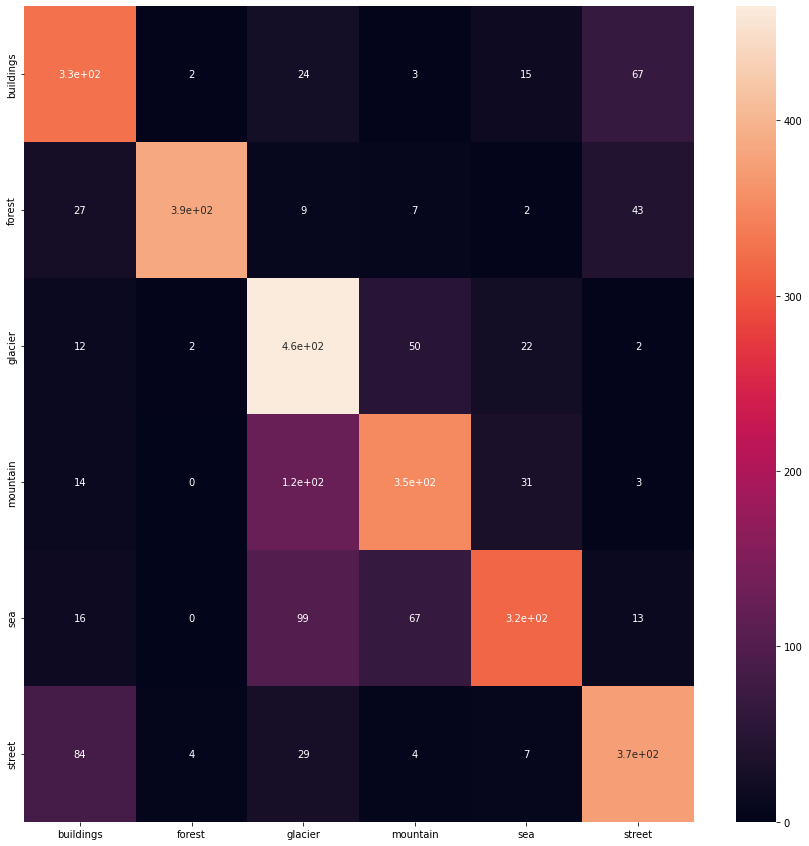

In [10]:
pred_classes = np.argmax(classifier.predict(test_images_x), axis=1)
print("Score de précision : " + str(round(accuracy_score(test_images_y, pred_classes), 4)))
cm = confusion_matrix(test_images_y, pred_classes) 
df = pd.DataFrame(cm, classes_dir.keys(), classes_dir.keys())
plt.figure(figsize=(15, 15))
sn.heatmap(df, annot=True)
plt.show()

On obtient une précision globale de 73,9%. <br>
En affichant la matrice de confusion, on peut voir que le modèle a le plus de mal à discerner la mer et les glaciers ainsi que les buildings et les rues.